In [63]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
spine_df = pd.read_json('data/criterion_list.json')

boxsets_info_df = pd.read_json('data/criterion_boxsets.json')
single_info_df = pd.read_json('data/criterion_single_movies.json')

info_df = pd.concat([boxsets_info_df, single_info_df], axis=0, ignore_index=True)

df = pd.merge(spine_df, info_df, on='url', how='left')

df.drop(['date_scraped', 'time_scraped'], axis=1, inplace=True)
df.replace('', np.NaN, inplace=True)

del spine_df
del info_df
del boxsets_info_df
del single_info_df

In [14]:
df.head()

,country,director,spine_number,title,url,year_of_release,aspect_ratio,blurb,cast,colour,credits,films_contained,formats,language,run_time,special_features
0,"France,",Jean-Luc Godard,482,2 or 3 Things I Know About Her,https://www.criterion.com/films/1333-2-or-3-th...,1967,2.35:1,In 2 or 3 Things I Know About Her (2 ou 3 chos...,"Marina Vlady, Anny Duperey, Joseph Gerhard, Ro...",Color,Director Jean-Luc Godard Screenplay Jean-Luc G...,NaN,DVD,French,87 minutes,"New, restored high-definition digital transfer..."
1,"United States,",Delmer Daves,657,3:10 to Yuma,https://www.criterion.com/films/27910-3-10-to-...,1957,1.85:1,"In this beautifully shot, psychologically comp...","Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",Black & White,Director Delmer Daves Produced by David Heilwe...,NaN,"Blu-Ray, DVD",English,92 minutes,"New, restored 4K digital film transfer, with u..."
2,,,327,3 Films by Louis Malle,https://www.criterion.com/boxsets/397-3-films-...,,,Few directors have portrayed the agonies and e...,,,,"Au revoir les enfants, Murmur of the Heart, La...",DVD,,NaN,"New, restored high-definition digital transfer..."
3,,,672,3 Films by Roberto Rossellini Starring Ingrid ...,https://www.criterion.com/boxsets/982-3-films-...,,,"In the late 1940s, the incandescent Hollywood ...",,,,"Journey to Italy, Europe '51, Stromboli","Blu-Ray, DVD",,NaN,New digital restorations of the English- and I...
4,,,528,3 Silent Classics by Josef von Sternberg,https://www.criterion.com/boxsets/744-3-silent...,,,"Vienna-born, New York-raised Josef von Sternbe...",,,,"The Docks of New York, The Last Command, Under...",Blu-Ray,,NaN,High-definition digital restorations of all th...


In [15]:
list(df.columns)

['country',
 'director',
 'spine_number',
 'title',
 'url',
 'year_of_release',
 'aspect_ratio',
 'blurb',
 'cast',
 'colour',
 'credits',
 'films_contained',
 'formats',
 'language',
 'run_time',
 'special_features']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 0 to 1440
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           1320 non-null   object
 1   director          1319 non-null   object
 2   spine_number      1071 non-null   object
 3   title             1441 non-null   object
 4   url               1441 non-null   object
 5   year_of_release   1312 non-null   object
 6   aspect_ratio      1314 non-null   object
 7   blurb             1441 non-null   object
 8   cast              1320 non-null   object
 9   colour            1313 non-null   object
 10  credits           1276 non-null   object
 11  films_contained   120 non-null    object
 12  formats           997 non-null    object
 13  language          1306 non-null   object
 14  run_time          1321 non-null   object
 15  special_features  1047 non-null   object
dtypes: object(16)
memory usage: 191.4+ KB


I have a feeling that alot of these NULLs will fall into the same few products since 
it looks like the box sets are largely null in the same set of columns. 

**to test this, I will create a NULL heatmap.**

<AxesSubplot:>

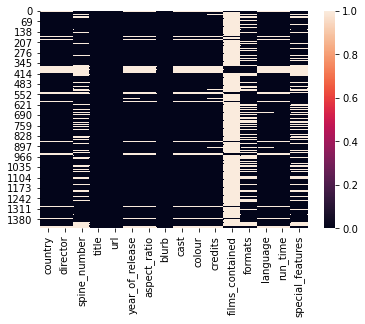

In [20]:
sns.heatmap(df.isnull())

so there are NULLs in spine_number and formats that seem largely unpatterned, whilst NULLs in other
columns appear to frequently fall on the same rows as expected. 

I believe spine number NULLs are very likely to be exclusively movies who appear in box sets rather than individually

next for the sake of QAing the data I'd like to look at some unique values

In [21]:
df.describe()

,country,director,spine_number,title,url,year_of_release,aspect_ratio,blurb,cast,colour,credits,films_contained,formats,language,run_time,special_features
count,1320,1319,1071,1441,1441,1312,1314,1441,1320,1313,1276,120,997,1306,1321,1047
unique,46,526,1070,1433,1441,97,34,1436,1311,10,1273,120,9,98,169,1040
top,"United States,",Ingmar Bergman,88,The Killers,https://www.criterion.com/boxsets/427-eclipse-...,1966,1.33:1,"Jean Renoir and Akira Kurosawa, two of cinema'...",Director,Color,Director Vilgot Sjoman Producer Goran Lindgren...,"Kings of the Road, Alice in the Cities, Wrong ...","Blu-Ray, DVD",English,96 minutes,"New digital transfer of The Emperor Jones, cre..."
freq,405,41,2,3,1,40,394,3,6,695,2,1,654,528,41,2


standing out to me here are:
- **colour** as i can't guess what other than colour or B&W could be options here
- **formats** as other than DVD and BluRay what formats are there
- **language** as i wasnt aware there existed 98 languages
- country 
- aspect_ratio 
- year_of_release


**Colour**

In [22]:
list(df.colour.unique())

['Color',
 'Black & White',
 nan,
 'Black and White/Color',
 '1.37:1',
 '2.35:1',
 '1.33:1',
 '1.85:1',
 '1.66:1',
 '1.33:1/1.78:1',
 '1.78:1']

from further investigation I have come up with the following method of cleaning the fuzziness surrounding certain columns:
- in cases where colour or langauge are in aspect_ratio, these values are moved into their correct columns
- in cases where aspect ratio is in colour this is moved into aspect_ratio, and then the colour is set to NaN as it is not salvageable
- in cases where colour is stored in run_time this is moved into colour and then run_time is set to NaN
- in cases where language contains spine number this is replaced with NaN
- in cases where language contains aspect_ratio this is moved into aspect ratio then lanuage is set to NaN
- cases where aspect ratio still isnt a true aspect ratio value are then set to NaN
- single films are set to contain themselves.

In [23]:
colour_asp = list(df[(df.aspect_ratio.isin(['Black & White', 'Color']))].index)
lang_asp = list(df[(df.aspect_ratio.str.contains('[a-z]') == True) & (~df.aspect_ratio.isin(['Black & White', 'Color']))].index)

df.loc[df.index.isin(colour_asp), 'colour'] = df.loc[df.index.isin(colour_asp), 'aspect_ratio']
df.loc[df.index.isin(lang_asp), 'language'] = df.loc[df.index.isin(lang_asp), 'aspect_ratio']

df.loc[df.colour.str.contains('[a-z]') == False, 'aspect_ratio'] = df.loc[df.colour.str.contains('[a-z]') == False, 'colour']
df.loc[df.colour.str.contains('[a-z]') == False, 'colour'] = np.nan

df.loc[df.run_time.str.contains('[0-9]') == False, 'colour'] = df.loc[df.run_time.str.contains('[0-9]') == False, 'run_time']
df.loc[df.run_time.str.contains('[0-9]') == False, 'run_time'] = np.nan

df.loc[~df.language.isnull() & df.language.str.contains('Spine #'), 'language'] = np.nan
df.loc[df.language.str.contains('[a-z]') == False, 'aspect_ratio'] = df.loc[df.language.str.contains('[a-z]') == False, 'language']
df.loc[df.language.str.contains('[a-z]') == False, 'language'] = np.nan

df.loc[df.aspect_ratio.str.contains('[0-9]') == False, 'aspect_ratio'] = np.nan

df.loc[df.films_contained.isna(), 'films_contained'] = df.title

so now every cell contains the correct value, so its time to start doing some cleaning. some ideas are:
- remove the pointless commas from the country of origin
- remove the word /minuets from all the run times so it can just be saved as int since theyre all given as minuets anywho
- set dtypes correctly


In [24]:
df.run_time = df.run_time.str.replace(' minutes', '').astype('float')

df.country = df.country.str.replace(',', '')

**Feature Creation**

next up we'll be doing some basic feature creation, with ideas including:
- boxset yes or no
- english language yes or no
- dvd vs blu ray rather than the 8 types of dvd vs blu ray

In [95]:
df['decade_of_release'] = df['year_of_release'].str[:3] + '0'

df['dvd'] =  np.where(df['formats'].str.contains('DVD', na=False), 1, 0)
df['bluray'] = np.where(df['formats'].str.contains('Blu-Ray', na=False), 1, 0)

df['english'] = np.where(df['language'].str.contains('English', na=False), 1, 0)

df['boxset'] = np.where(df['url'].str.contains('boxset', na=False), 1, 0)

df['available_individually'] = np.select([(df['boxset'] == 0) & (df['spine_number'].isna()),
                                          (df['boxset'] == 0) & (~df['spine_number'].isna())],
                                         [0, 
                                          1],
                                         default=np.nan)  # set nan where boxsets occur?


next just because i can as much as anything I'd like to create a 'sets included in' variable, listing any boxsets a given film is contained within. This will be set to NaN for films only available as single releases / boxsets? 

the following method is not the msot readable, but is alot faster than the alternative I was using before that just utilised loops. thanks to this thread:
https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
for providing the basis for the code

In [135]:
def get_boxsets_contained_in(title,
                             boxsets):
    """
    function that gets the boxsets a given film is included in, or returns nan if its not in any
    
    :param title:   (string) the title of the movie
    :param boxsets: (pd.DataFrame) dataframe containing two columns: 'title' and 'films_contained'.
                    the latter of these takes values of lists whilst the former takes string
                    
    :return:        (string / np.NaN) string of comma separated boxsets if film is contained in at least 
                    one, else np.NaN
    """
    boxsets_contained_in = boxsets[pd.DataFrame(boxsets.films_contained.tolist())\
                                     .isin([title]).values]['title'].values.tolist()      
    # ^^ this method is used to pull up a list of all titles from boxsets where films_contained 
    # contains title. the list will exist but be empty if none exist.
        
    if len(boxsets_contained_in) > 0:
        return ', '.join(boxsets_contained_in)
    
    else: 
        return np.nan
    
    
boxsets = df[df['boxset'] == 1][['title', 'films_contained']].copy().reset_index()
boxsets['films_contained'] = boxsets['films_contained'].str.split(',')

df['boxsets_contained_in'] = df.apply(lambda x: get_boxsets_contained_in(x['title'], boxsets), axis=1)

I'll now replot the null heatmap to see how these new variables are behaving in their rawest form

<AxesSubplot:>

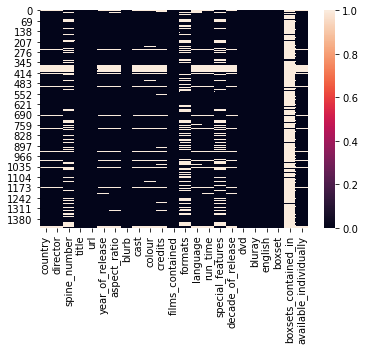

In [138]:
sns.heatmap(df.isna())

available_individually here provides clarity on where boxsets lie, confirming the general assumption on which rows were boxsets.

boxsets_contained_in also does an interesting job of doing something but im not sure how to articulate it. DIY findings with the boiiiis i guess.

In [97]:
df.to_csv('data/criterion_cleaned.csv', index=False)